
# 📘 Day 3: Eigenvalues, Eigenvectors & PCA
Topic: Dimensionality Reduction for Personalization

### 🎯 Goal:
Understand how PCA (Principal Component Analysis) helps uncover hidden patterns
and reduces complex data (like customer features) into key components
that explain most of the variance.

### 🔧 Step 1: Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 🧩 Step 2: Build Intuition — Eigenvalues & Eigenvectors


In [2]:
# Create a covariance matrix (2D for simplicity)
A = np.array([[2, 0.8],
              [0.8, 1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [2.44339811 0.55660189]
Eigenvectors:
 [[ 0.87464248 -0.48476853]
 [ 0.48476853  0.87464248]]


## 🧠 Intuition:
#### Eigenvectors → the directions where data varies the most
#### Eigenvalues → how much variance (information) is captured along those directions


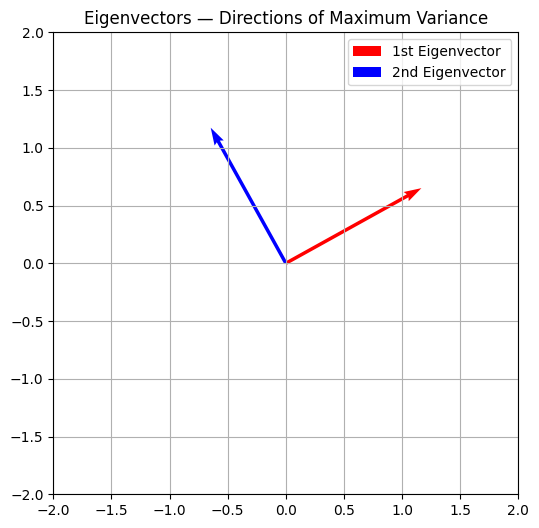

In [3]:
# Visualizing these directions
plt.figure(figsize=(6,6))
origin = np.zeros(2)
plt.quiver(*origin, eigenvectors[0,0], eigenvectors[1,0], color='r', scale=3, label='1st Eigenvector')
plt.quiver(*origin, eigenvectors[0,1], eigenvectors[1,1], color='b', scale=3, label='2nd Eigenvector')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title("Eigenvectors — Directions of Maximum Variance")
plt.grid(True)
plt.legend()
plt.show()

### 📊 Step 3: Real Data Example — Sales/Marketing Dataset

In [4]:
# Simulated dataset: 5 customers, 4 product features
data = {
    'Ad_Spend': [100, 200, 150, 300, 250],
    'Website_Visits': [400, 800, 500, 900, 700],
    'Email_Clicks': [50, 100, 70, 120, 90],
    'Revenue': [1000, 2300, 1600, 2800, 2500]
}

df = pd.DataFrame(data)
print("\n🧾 Marketing Data:\n", df)

# Standardize (very important before PCA)
scaler = StandardScaler()
scaled = scaler.fit_transform(df)


🧾 Marketing Data:
    Ad_Spend  Website_Visits  Email_Clicks  Revenue
0       100             400            50     1000
1       200             800           100     2300
2       150             500            70     1600
3       300             900           120     2800
4       250             700            90     2500


### 🔍 Step 4: Apply PCA

In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print("\nPrincipal Components:\n", pca_df)

# Variance explained by each component
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)


Principal Components:
         PC1       PC2
0 -2.949905 -0.037692
1  0.868495 -0.535482
2 -1.452465  0.073857
3  2.638735  0.008139
4  0.895141  0.491178

Explained Variance Ratio: [0.96650371 0.02674689]


### 📈 Step 5: Understanding the Output

#### The first component (PC1) explains the most variance — usually the key behavioral trend.
#### The second (PC2) explains what's left over, orthogonal to PC1.

#### Together, they let us cluster or segment customers efficiently.


In [6]:
print("\n🧠 Interpretation:")
print(f"- PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance.")
print(f"- PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance.")
print("=> PCA helps us visualize customers in fewer dimensions while keeping most of the important information!")


🧠 Interpretation:
- PC1 explains 96.65% of variance.
- PC2 explains 2.67% of variance.
=> PCA helps us visualize customers in fewer dimensions while keeping most of the important information!


### 🧮 Step 6: Optional — Reconstruct Original Data (Approximation)

In [7]:
# You can reconstruct an approximation of the original data using inverse transform
approx = pca.inverse_transform(principal_components)
approx_df = pd.DataFrame(scaler.inverse_transform(approx), columns=df.columns)
print("\n🔄 Reconstructed (Approximate) Data:\n", approx_df)


🔄 Reconstructed (Approximate) Data:
      Ad_Spend  Website_Visits  Email_Clicks      Revenue
0   95.007228      390.726490     50.511699  1063.927595
1  204.908443      795.867376    101.638922  2225.597575
2  152.700567      517.847908     67.648756  1576.612283
3  292.700833      903.517247    117.987710  2908.349122
4  254.682929      692.040978     92.212913  2425.513424


### 🧩 Step 7: Learnings Summary

1. Eigenvectors show *directions* of maximum variance (important features).
2. Eigenvalues show *how much* variance each direction captures.
3. PCA reduces dimensions while preserving essential patterns.
4. Great for visualization, noise reduction, and personalization.
5. Commonly used in recommender systems, customer segmentation, and feature compression.